In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loadind dataset

In [356]:
df1=pd.read_csv('Bengaluru_House_Data.csv')

## Performing EDA 

In [357]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [358]:
df1.shape

(13320, 9)

In [359]:
for i in df1.columns:
    print(i,df1[i].sort_values().unique(),'\n')

area_type ['Built-up  Area' 'Carpet  Area' 'Plot  Area' 'Super built-up  Area'] 

availability ['14-Jul' '14-Nov' '15-Aug' '15-Dec' '15-Jun' '15-Nov' '15-Oct' '16-Dec'
 '16-Jan' '16-Jul' '16-Mar' '16-Nov' '16-Oct' '16-Sep' '17-Apr' '17-Aug'
 '17-Dec' '17-Feb' '17-Jan' '17-Jul' '17-Jun' '17-Mar' '17-May' '17-Nov'
 '17-Oct' '17-Sep' '18-Apr' '18-Aug' '18-Dec' '18-Feb' '18-Jan' '18-Jul'
 '18-Jun' '18-Mar' '18-May' '18-Nov' '18-Oct' '18-Sep' '19-Apr' '19-Aug'
 '19-Dec' '19-Feb' '19-Jan' '19-Jul' '19-Jun' '19-Mar' '19-May' '19-Nov'
 '19-Oct' '19-Sep' '20-Apr' '20-Aug' '20-Dec' '20-Feb' '20-Jan' '20-Jul'
 '20-Jun' '20-Mar' '20-May' '20-Nov' '20-Oct' '20-Sep' '21-Aug' '21-Dec'
 '21-Feb' '21-Jan' '21-Jul' '21-Jun' '21-Mar' '21-May' '21-Nov' '21-Oct'
 '21-Sep' '22-Dec' '22-Jan' '22-Jun' '22-Mar' '22-May' '22-Nov'
 'Immediate Possession' 'Ready To Move'] 

location [' Anekal' ' Banaswadi' ' Basavangudi' ... 'white field,kadugodi'
 'whitefiled' nan] 

size ['1 BHK' '1 Bedroom' '1 RK' '10 BHK' '10

In [360]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## handling  null values

In [361]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [362]:
drop_columns=['area_type','availability','society','balcony']

In [363]:
df1=df1.drop(columns=drop_columns)

In [364]:
df1.dropna(inplace=True)

In [365]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


## Feature Engineering

In [366]:
df1['size']=df1['size'].map(lambda x:x.split()[0])

total_sqft column contains both numerical and object type values so we are going to consilder only those values which are numerical rest all we will try to fill value with some technique

In [367]:
def is_num(x):
    try:
        float(x)
    except:
        return False
    return True

In [368]:
df1[df1.total_sqft.apply(is_num)]

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [369]:
df1[~df1.total_sqft.apply(is_num)].value_counts()

location        size  total_sqft      bath  price  
Whitefield      4     2830 - 2882     5.0   154.500    2
 Rachenahalli   1     385 - 440       1.0   19.800     1
Pragathi Nagar  1     799 - 803       1.0   33.645     1
Rajaji Nagar    4     2563 - 2733     5.0   251.500    1
Rajapura        2     86.72Sq. Meter  2.0   40.000     1
                                                      ..
Hormavu         1     527 - 639       1.0   28.275     1
                2     943 - 1220      2.0   38.665     1
                3     1469 - 1766     3.0   73.595     1
Hosa Road       1     615 - 985       1.0   39.990     1
arudi           3     6Acres          2.0   80.000     1
Length: 189, dtype: int64

above we see that total_sqrt contain some noise values. we will use avg of those values which are having separated by '-' . else we will return null

In [370]:
def transform_total_sqrt(x):
    if len(x.split('-'))==2:
        return (float(x.split('-')[0])+ float(x.split('-')[1]))/2
    try:
        return float(x)
    except:
        return None

In [371]:
df1.total_sqft=df1.total_sqft.apply(transform_total_sqrt)

In [372]:
df1.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [373]:
df1.dropna(inplace=True)

In [374]:
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [375]:
df1['size']=df1['size'].astype(int)

In [376]:
df1.describe()

,size,total_sqft,bath,price
count,13200.000000,13200.000000,13200.000000,13200.000000
mean,2.800833,1555.302783,2.691136,112.276178
std,1.292843,1237.323445,1.338915,149.175995
min,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,3.000000,1275.000000,2.000000,71.850000
75%,3.000000,1672.000000,3.000000,120.000000
max,43.000000,52272.000000,40.000000,3600.000000


## price per squarefoot values by Feature Engineering

In [377]:
df1['per_sqrt_price']=df1.price*100000/df1.total_sqft

In [378]:
df1.describe()

,size,total_sqft,bath,price,per_sqrt_price
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,2.800833,1555.302783,2.691136,112.276178,7.920759e+03
std,1.292843,1237.323445,1.338915,149.175995,1.067272e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.267701e+03
50%,3.000000,1275.000000,2.000000,71.850000,5.438331e+03
75%,3.000000,1672.000000,3.000000,120.000000,7.317073e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [379]:
df1.to_csv('for_analysis.csv',index=False)

In [380]:
df1.location=df1.location.str.strip()


In [381]:
df1.location.value_counts()

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

## dimendion reduction

In [382]:
location_stats=df1.location.value_counts()

In [383]:
location_stats[location_stats>10].size

240

In [384]:
location_stats[location_stats<=10].size

1047

In [385]:
location_stats.shape

(1287,)

In [386]:
location_less_than_20=location_stats[location_stats<=10]
location_less_than_20

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [387]:
df1.location=df1.location.map(lambda x: 'other' if x in location_less_than_20 else x)

## outlier analysis and handling

In [388]:
df1.describe()

,size,total_sqft,bath,price,per_sqrt_price
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,2.800833,1555.302783,2.691136,112.276178,7.920759e+03
std,1.292843,1237.323445,1.338915,149.175995,1.067272e+05
min,1.000000,1.000000,1.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.267701e+03
50%,3.000000,1275.000000,2.000000,71.850000,5.438331e+03
75%,3.000000,1672.000000,3.000000,120.000000,7.317073e+03
max,43.000000,52272.000000,40.000000,3600.000000,1.200000e+07


In [389]:
df1.shape

(13200, 6)

In [390]:
columns_outlier=df1.columns.to_list()

In [391]:
columns_outlier.remove('location')
columns_outlier

['size', 'total_sqft', 'bath', 'price', 'per_sqrt_price']

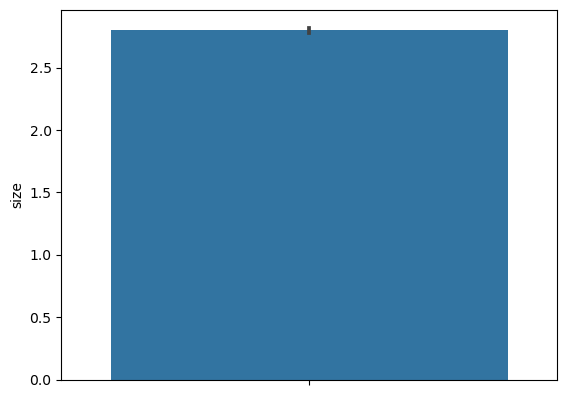

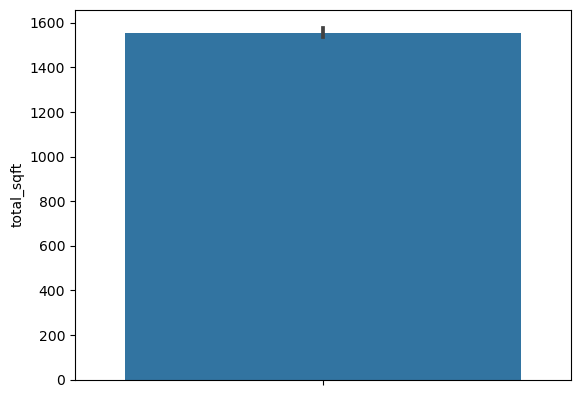

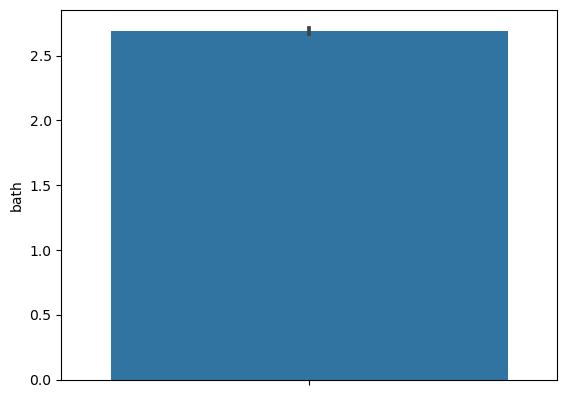

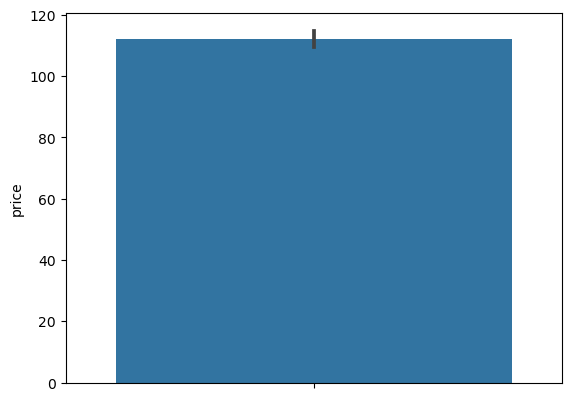

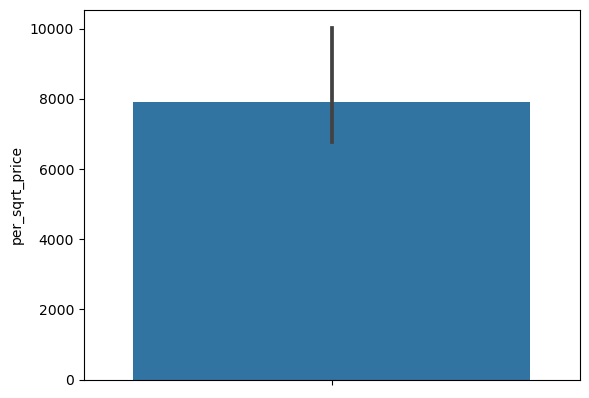

In [392]:
for i in columns_outlier:
    plt.figure()
    sns.barplot(data=df1,y=i)
    

assuming that a bedroom is around 300 sq ft . we will eliminate those having area per bedroom is less than 300

In [393]:
df2=df1[df1['total_sqft']/df1['size']>300]

In [394]:
df2

,location,size,total_sqft,bath,price,per_sqrt_price
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


Remove outlier using mean and standard deviation 

In [395]:
def outlier(df):
    df3=pd.DataFrame()
    for i,sub_df in df2.groupby('location'):
        m=np.mean(sub_df.per_sqrt_price)
        sd=np.std(sub_df.per_sqrt_price)
        clean_data=sub_df[(sub_df.per_sqrt_price<=(m+sd)) & (sub_df.per_sqrt_price>(m-sd))]
        df3=pd.concat([df3,clean_data],ignore_index=True)
    return df3
    

In [396]:
df3=outlier(df2)

In [397]:
df3

,location,size,total_sqft,bath,price,per_sqrt_price
0,1st Block Jayanagar,4,2850.0,4.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.00,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.00,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.00,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...
10013,other,2,1353.0,2.0,110.00,8130.081301
10014,other,1,812.0,1.0,26.00,3201.970443
10015,other,3,1440.0,2.0,63.93,4439.583333
10016,other,2,1075.0,2.0,48.00,4465.116279


### plot scatter plot to get more insight

In [398]:
def scatter_plot(df,location):
    bhk2=df3[(df.location==location) & (df['size']==2)]
    bhk3=df3[(df.location==location) & (df['size']==3)]
    sns.scatterplot(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    sns.scatterplot(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50,marker='+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price in lakh')
    plt.legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


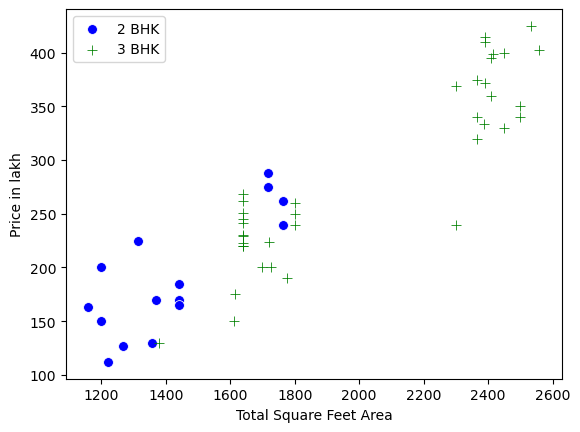

In [399]:
scatter_plot(df3,"Rajaji Nagar")

#### more insights from data using .describe()

In [400]:
df3.describe()

,size,total_sqft,bath,price,per_sqrt_price
count,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000
mean,2.559992,1504.883006,2.464664,90.721634,5626.720120
std,0.878710,877.964570,0.967681,86.299105,2213.235364
min,1.000000,350.000000,1.000000,10.000000,1250.000000
25%,2.000000,1109.000000,2.000000,49.000000,4248.645408
50%,2.000000,1288.500000,2.000000,67.000000,5165.597192
75%,3.000000,1650.000000,3.000000,100.000000,6388.888889
max,16.000000,30400.000000,16.000000,2200.000000,24509.803922


In [401]:
df3[df3.bath>10]

,location,size,total_sqft,bath,price,per_sqrt_price
5138,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8304,other,10,12000.0,12.0,525.0,4375.000000
8389,other,16,10000.0,16.0,550.0,5500.000000
9104,other,11,6000.0,12.0,150.0,2500.000000
9429,other,13,5425.0,13.0,275.0,5069.124424


In [402]:
df3

,location,size,total_sqft,bath,price,per_sqrt_price
0,1st Block Jayanagar,4,2850.0,4.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.00,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.00,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.00,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...
10013,other,2,1353.0,2.0,110.00,8130.081301
10014,other,1,812.0,1.0,26.00,3201.970443
10015,other,3,1440.0,2.0,63.93,4439.583333
10016,other,2,1075.0,2.0,48.00,4465.116279


#### excluded those data that have more bathrooms than bedroom

In [403]:
df4=df3[df3.bath<=df3['size']+2]

In [404]:
df4=df4.drop('per_sqrt_price',axis=1)

In [405]:
df4

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.00
1,1st Block Jayanagar,3,1630.0,3.0,194.00
2,1st Block Jayanagar,3,1875.0,2.0,235.00
3,1st Block Jayanagar,3,1200.0,2.0,130.00
4,1st Block Jayanagar,2,1235.0,2.0,148.00
...,...,...,...,...,...
10013,other,2,1353.0,2.0,110.00
10014,other,1,812.0,1.0,26.00
10015,other,3,1440.0,2.0,63.93
10016,other,2,1075.0,2.0,48.00


In [406]:
pd.get_dummies(data=df4,columns=['location'],prefix='',prefix_sep='')

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,428.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2,1353.0,2.0,110.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10014,1,812.0,1.0,26.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10015,3,1440.0,2.0,63.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10016,2,1075.0,2.0,48.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### one hot encoding for location column

In [407]:
df5=pd.get_dummies(data=df4,columns=['location'],prefix='',prefix_sep='')
df5

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,428.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2,1353.0,2.0,110.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10014,1,812.0,1.0,26.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10015,3,1440.0,2.0,63.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10016,2,1075.0,2.0,48.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Building model

In [408]:
x=df5.drop('price',axis=1)
x

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2,1353.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10014,1,812.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10015,3,1440.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10016,2,1075.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [409]:
y=df5.price
y

0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
          ...  
10013    110.00
10014     26.00
10015     63.93
10016     48.00
10017    400.00
Name: price, Length: 10014, dtype: float64

### Train test split for x and y

In [410]:
from sklearn.model_selection import train_test_split

In [411]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### testing only for linear regression model

In [412]:
lr=LinearRegression()

In [413]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

array([108.7328913 ,  42.07061332, 128.73415866, ...,  70.83531761,
       102.19751864,  94.20329489])

In [414]:
from sklearn import metrics

In [415]:
metrics.r2_score(y_test,y_pred)

0.8122614723979088

### using K fold cross validation to measure the accuracy of linear regression model

In [416]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [417]:
cv=ShuffleSplit(n_splits=5,test_size=0.2)

In [418]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.83065697, 0.82704042, 0.77012042, 0.81588341, 0.77732663])

## from above we conclude that this model is pretty good in terms of predicting price. now we check for some more model 

### training multiple models

In [419]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [420]:
models=[LinearRegression(),DecisionTreeRegressor(),Lasso()]

In [421]:
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model ,metrics.r2_score(y_test,y_pred),'\n')

LinearRegression() 0.8122614723979088 

DecisionTreeRegressor() 0.5939363248606784 

Lasso() 0.663379845615544 



### from above we are clear that Linear regression model performs the best

### ----------------------------------------------------------------

### creating function for prediction price

In [422]:
def pred(size,total_sqft,bath,location):
    location_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=size
    X[1]=total_sqft
    X[2]=bath
    if location_index>=0:
        X[location_index]=1
    return lr.predict([X])[0]
    

In [423]:
pred(2,1000,2,'1st Phase JP Nagar')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.13336229095434

In [ ]:
,1000, 3, 3

In [425]:
pred(3,1000,3,'Indira Nagar')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


173.3710854284139

In [426]:
np.where(x.columns=='Indira Nagar')[0][0]

116

### This prediction seems close 

## Export the tested model to a pickle file

In [431]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(lr,file)
    file.close()

# Thank you